In [1]:
from sklearn.datasets import fetch_openml

# Download the dataset from openml
dataset = fetch_openml(data_id=42803, as_frame=True)

# Extract feature matrix X and show 5 random samples

In [2]:
df_x=dataset['frame']

In [3]:
# Show size of the dataset
df_x.shape



import pandas as pd

# Count how many times each data type is present in the dataset
pd.value_counts(df_x.dtypes)



float64    61
object      6
dtype: int64

In [4]:
df_x.shape

(363243, 67)

In [5]:
df_x.head()

,Accident_Index,Vehicle_Reference_df_res,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,201501BS70001,1.0,19.0,0.0,9.0,0.0,8.0,0.0,0.0,0.0,...,7.0,3.0,5.0,1.0,0.0,0.0,2.0,0.0,NaN,NaN
1,201501BS70002,1.0,9.0,0.0,9.0,0.0,8.0,0.0,0.0,0.0,...,5.0,3.0,9.0,9.0,0.0,0.0,2.0,0.0,1.0,3.0
2,201501BS70004,1.0,9.0,0.0,9.0,0.0,2.0,0.0,0.0,0.0,...,6.0,3.0,1.0,3.0,0.0,0.0,2.0,0.0,1.0,6.0
3,201501BS70005,1.0,9.0,0.0,9.0,0.0,2.0,0.0,0.0,0.0,...,2.0,3.0,5.0,1.0,0.0,0.0,2.0,0.0,1.0,2.0
4,201501BS70008,1.0,1.0,0.0,18.0,0.0,8.0,0.0,0.0,0.0,...,8.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0


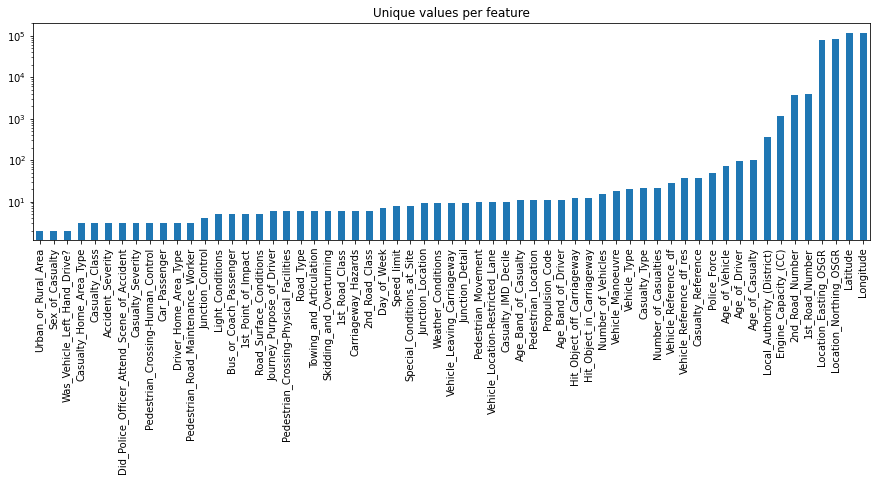

In [6]:
# For each numerical feature compute number of unique entries
unique_values = df_x.select_dtypes(
  include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15, 4),
                       title="Unique values per feature");

In [7]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363243 entries, 0 to 363242
Data columns (total 67 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               363243 non-null  object 
 1   Vehicle_Reference_df_res                     363243 non-null  float64
 2   Vehicle_Type                                 363181 non-null  float64
 3   Towing_and_Articulation                      362864 non-null  float64
 4   Vehicle_Manoeuvre                            363059 non-null  float64
 5   Vehicle_Location-Restricted_Lane             363067 non-null  float64
 6   Junction_Location                            363159 non-null  float64
 7   Skidding_and_Overturning                     363067 non-null  float64
 8   Hit_Object_in_Carriageway                    363080 non-null  float64
 9   Vehicle_Leaving_Carriageway                  363084 non-nul

In [8]:
# Check number of duplicates while ignoring the index feature
n_duplicates = df_x.drop(labels=["Accident_Index"], axis=1).duplicated().sum()
print(f"You seem to have {n_duplicates} duplicates in your database.")



#  Extract column

You seem to have 22 duplicates in your database.


In [9]:
columns_to_consider=df_x.drop(labels=["Accident_Index"],axis=1).columns

In [10]:
df_x=df_x.drop_duplicates(subset=columns_to_consider)

In [11]:
df_x.shape

(363221, 67)

In [12]:
#missing value

In [13]:
df_x.isna()

,Accident_Index,Vehicle_Reference_df_res,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363238,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
363239,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
363240,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
363241,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


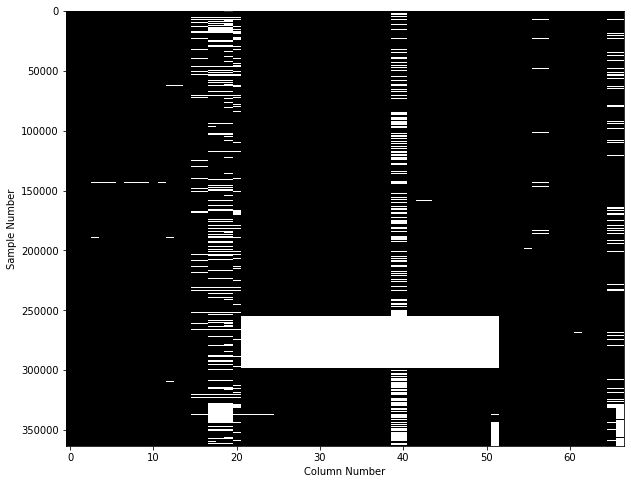

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(df_x.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number");

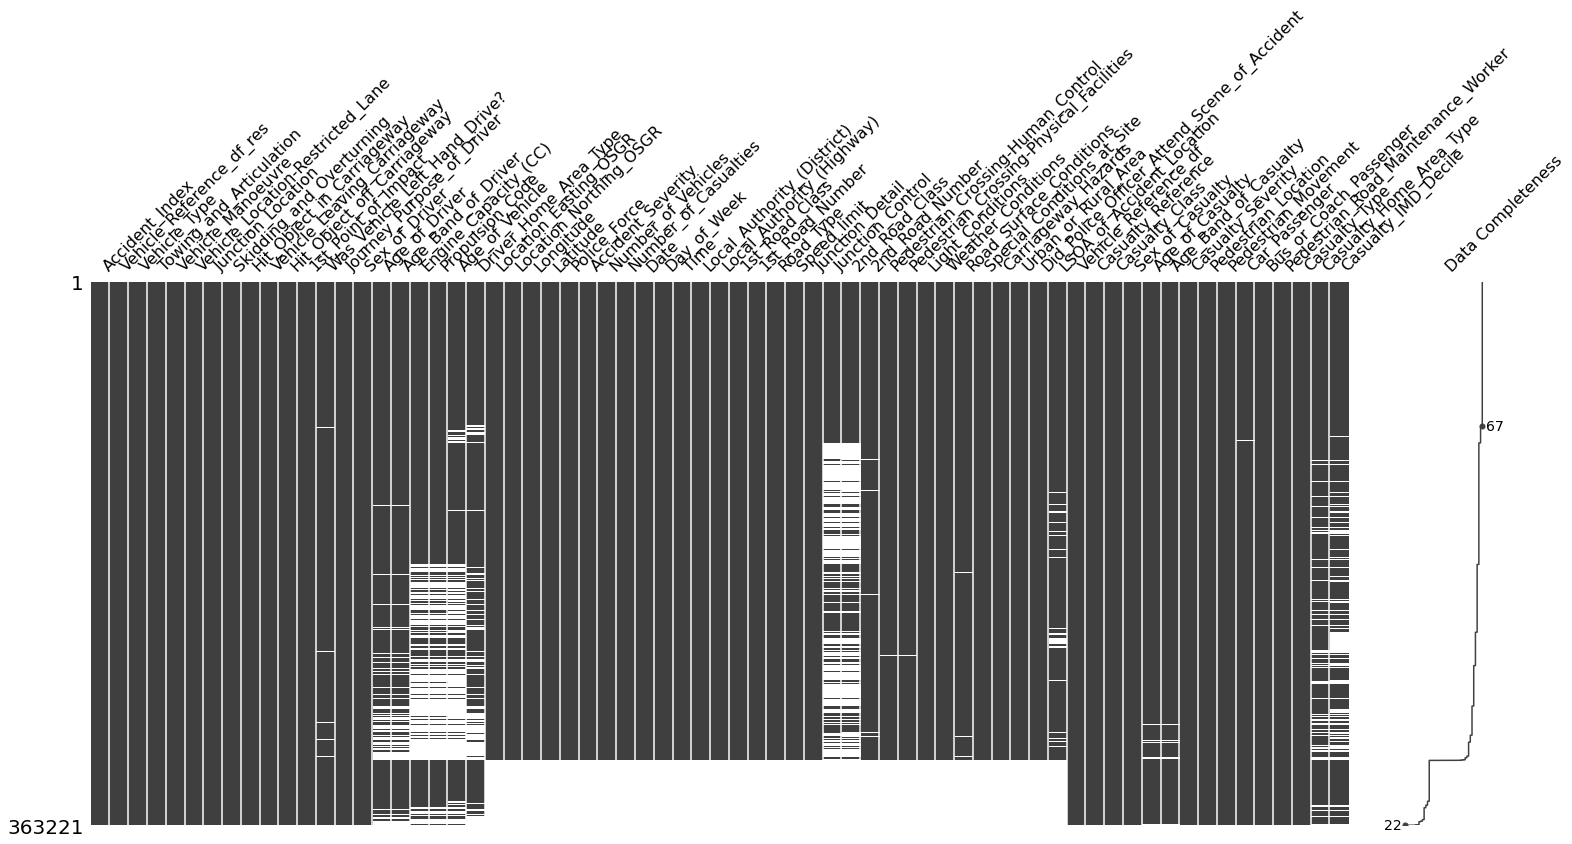

In [15]:
import missingno as msno

msno.matrix(df_x, labels=True, sort="descending");

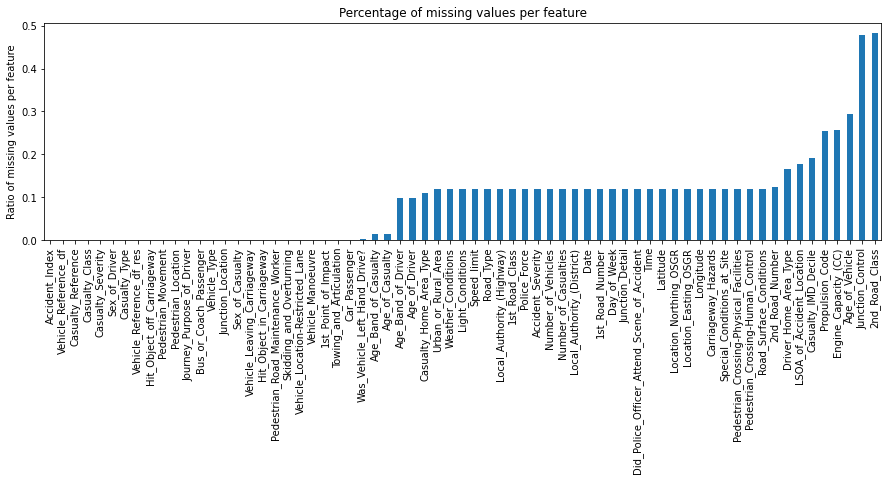

In [18]:
df_x.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

In [19]:
df_x = df_x.dropna(thresh=df_x.shape[0] * 0.85, axis=1)
df_x.shape

(363221, 59)

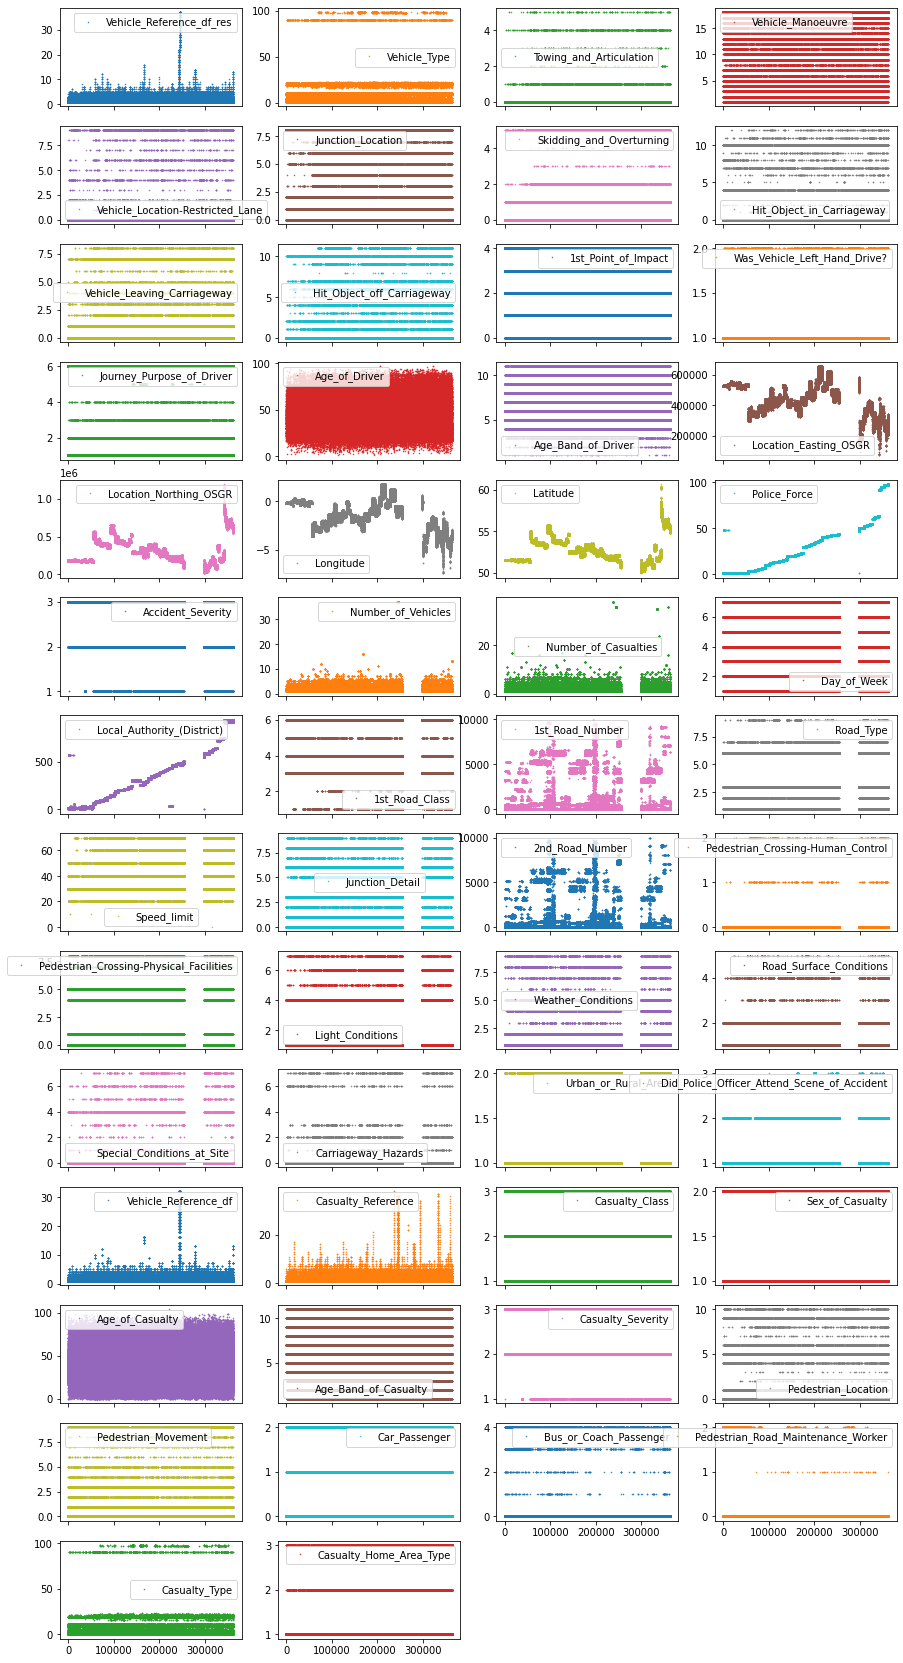

In [20]:
df_x.plot(lw=0,
          marker=".",
          subplots=True,
          layout=(-1, 4),
          figsize=(15, 30),
          markersize=1);

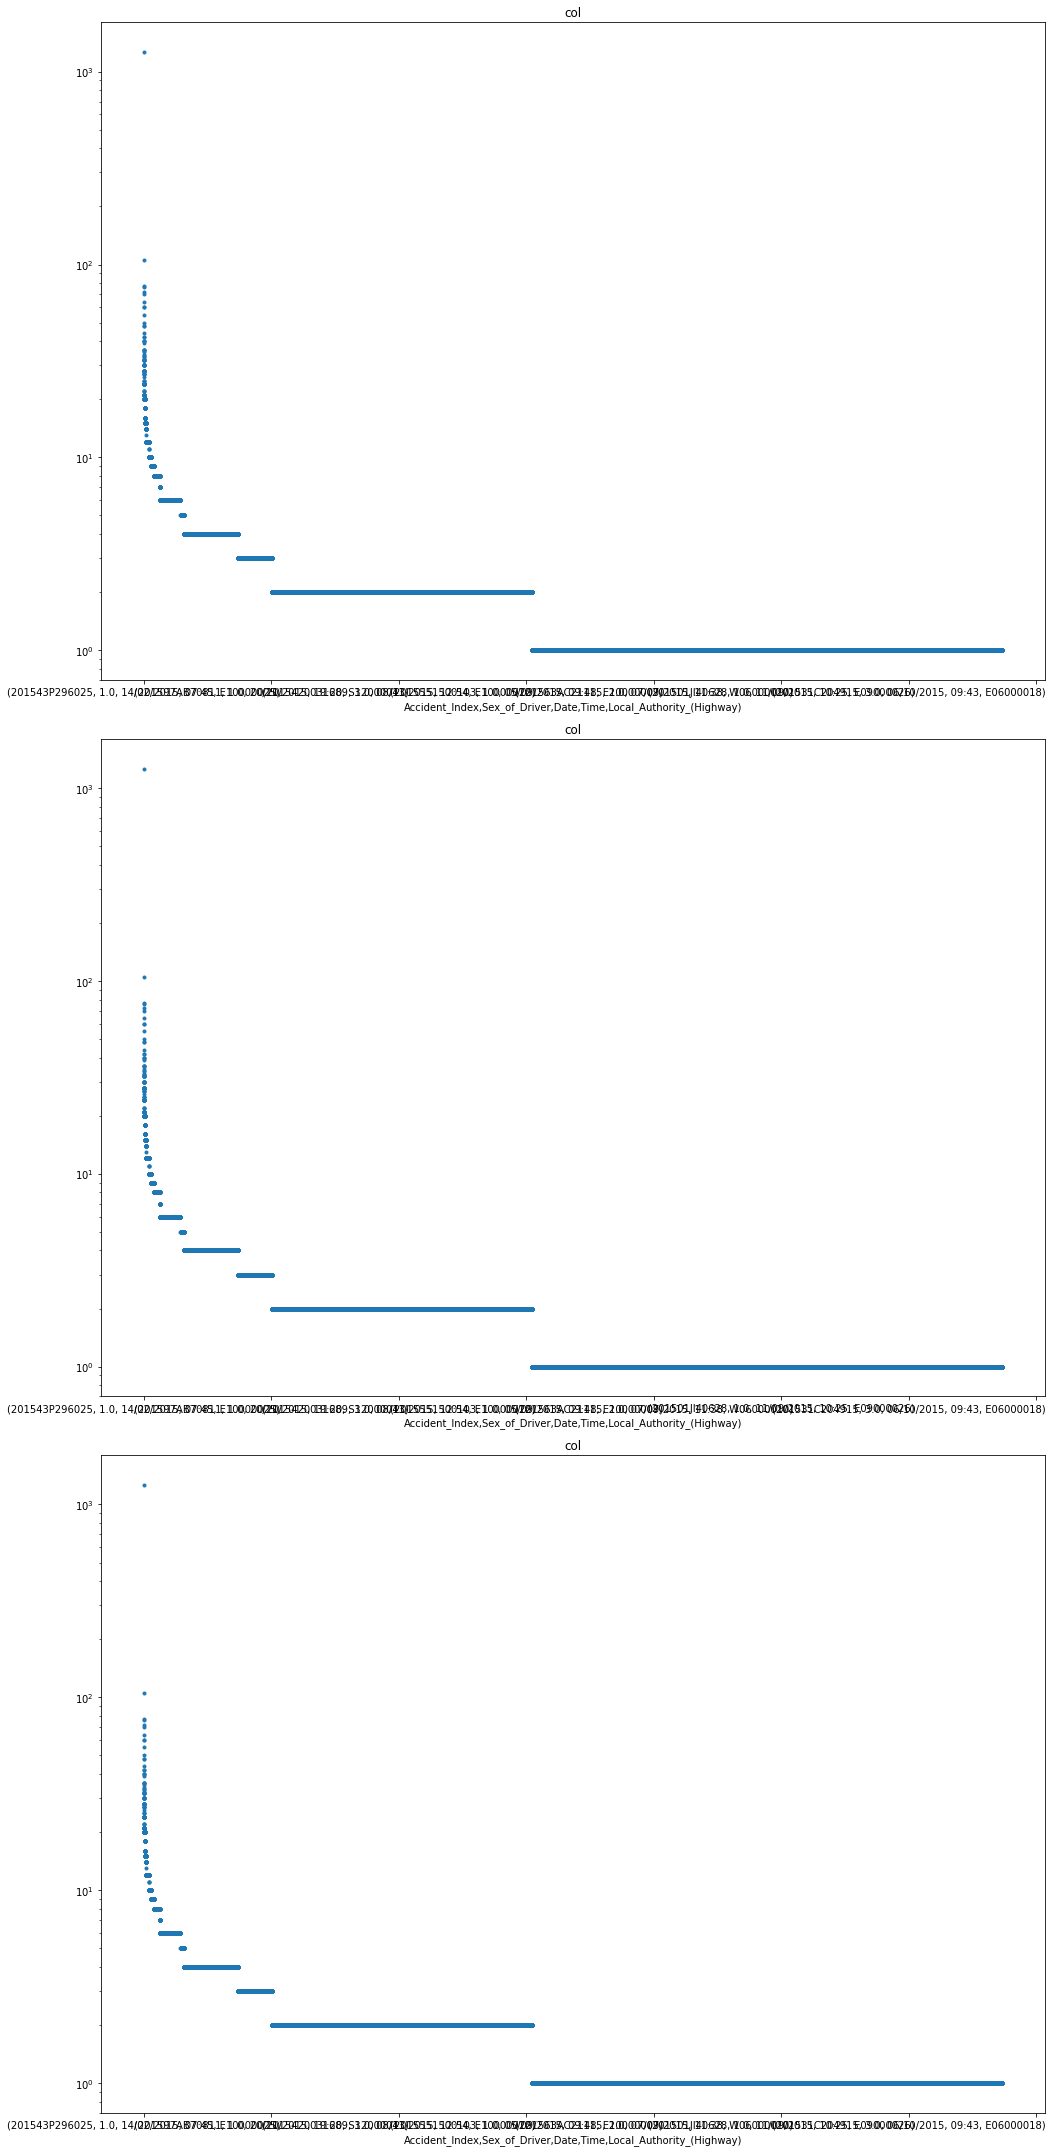

In [21]:
# Create figure object with 3 subplots
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(12, 8))

# Identify non-numerical features
df_non_numerical = df_x.select_dtypes(exclude=["number", "datetime"])

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_non_numerical.columns, axes.ravel()):
  df_non_numerical.value_counts().plot(logy=True,
          marker=".",
          lw=0,
          title="col",
          figsize=(15, 30),
          ax=ax);
plt.tight_layout()

In [22]:
# Collect entry values of the 10 most frequent accidents
accident_ids = df_non_numerical["Accident_Index"].value_counts().head(10).index

# Removes accidents from the 'accident_ids' list
df_x = df_x[~df_x["Accident_Index"].isin(accident_ids)]
df_x.shape

(360898, 59)

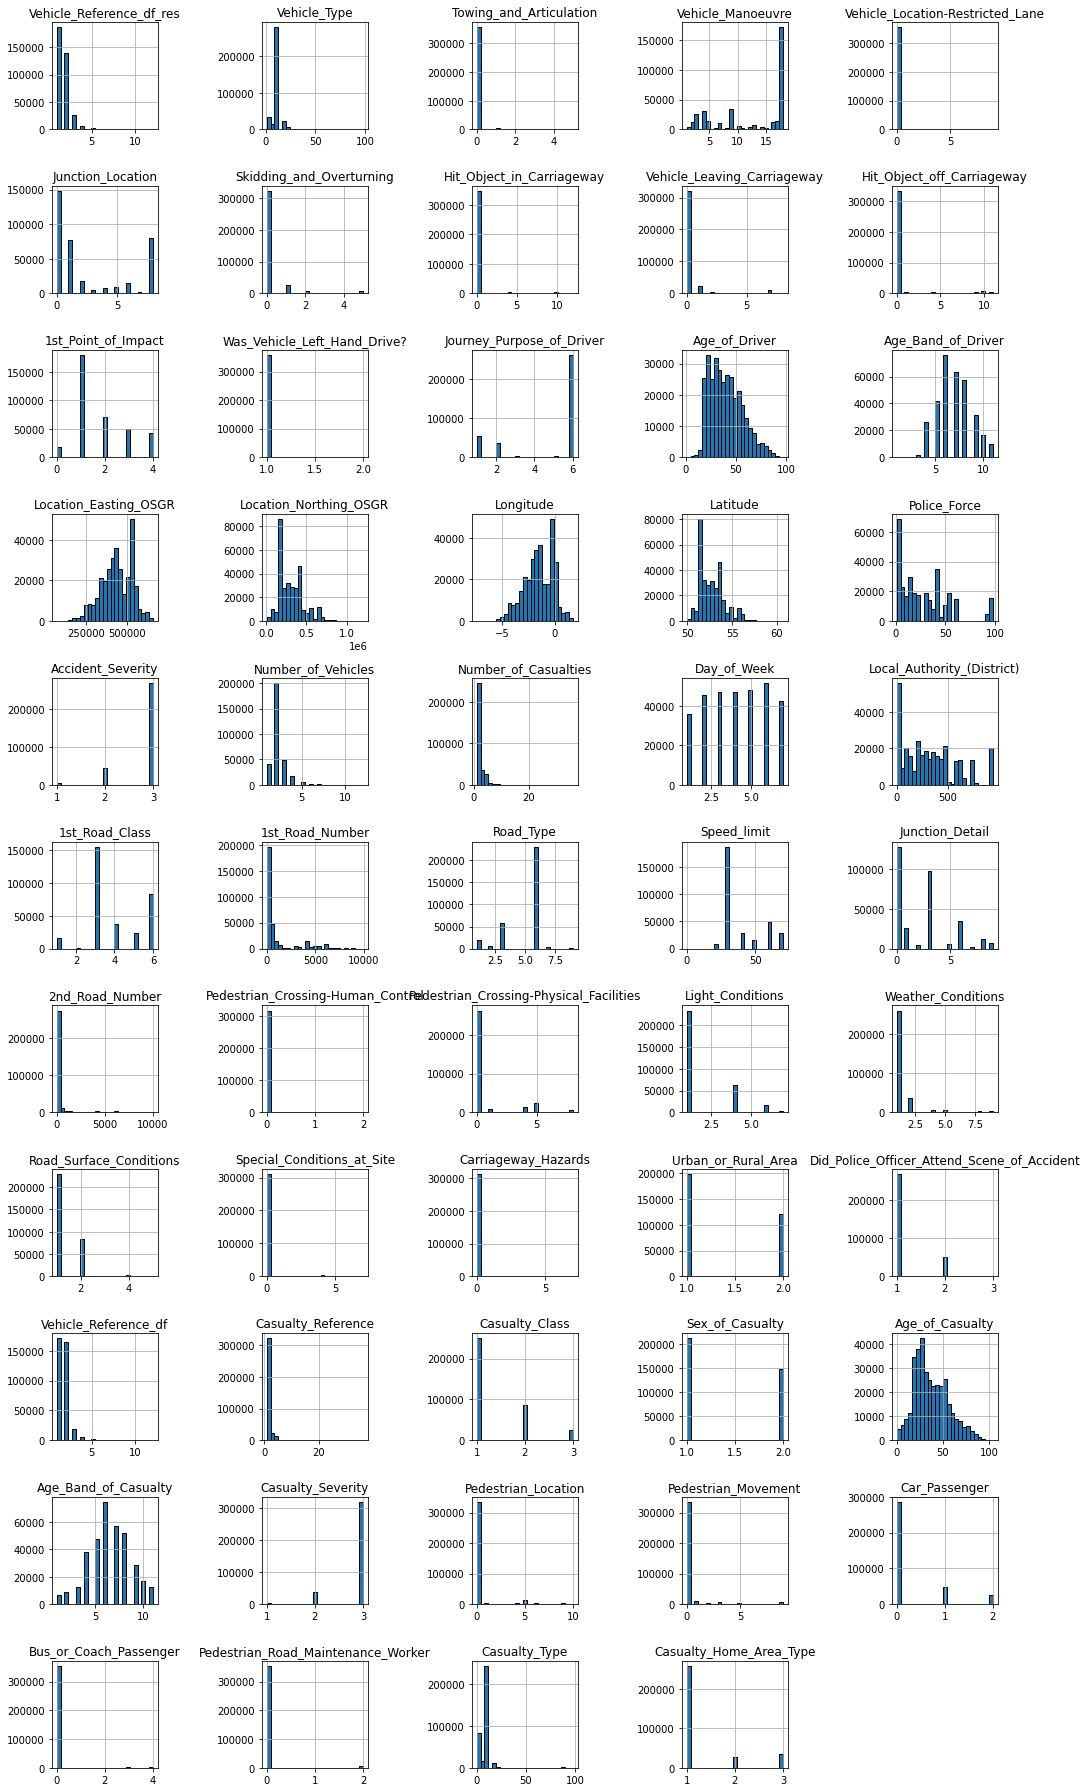

In [23]:
# Plots the histogram for each numerical feature in a separate subplot
df_x.hist(bins=25, figsize=(15, 25), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

In [24]:
# Collects for each feature the most frequent entry
most_frequent_entry = df_x.mode()

# Checks for each entry if it contains the most frequent entry
#df_freq = df_x.eq(most_frequent_entry.values, axis=1)

# Computes the mean of the 'is_most_frequent' occurrence
#df_freq = df_freq.mean().sort_values(ascending=False)

# Show the 5 top features with the highest ratio of singular value content
#display(df_freq.head())

# Visualize the 'df_freq' table
#df_freq.plot.bar(figsize=(15, 4));



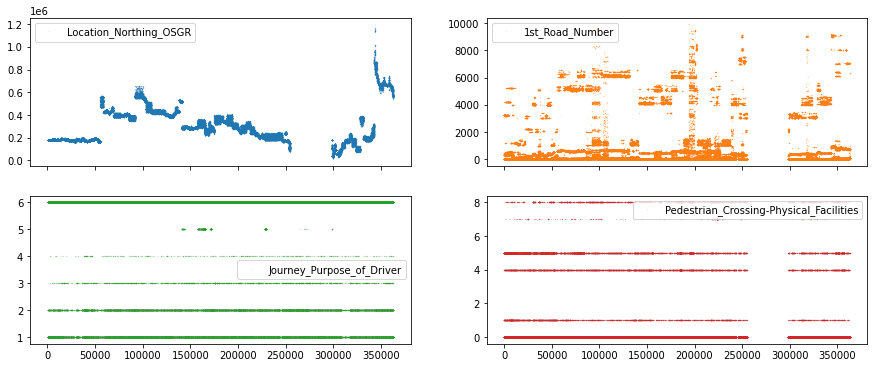

In [25]:
df_x[["Location_Northing_OSGR",
      "1st_Road_Number",
      "Journey_Purpose_of_Driver",
      "Pedestrian_Crossing-Physical_Facilities"]].plot(
    lw=0, marker=".", subplots=True, layout=(-1, 2),
  markersize=0.1, figsize=(15, 6));

In [26]:
# Creates mask to identify numerical features with at least 25 unique features
cols_continuous = df_x.select_dtypes(include="number").nunique() >= 25

In [27]:
# Create a new dataframe which only contains the continuous features
df_continuous = df_x[cols_continuous[cols_continuous].index]
df_continuous.shape



(360898, 11)

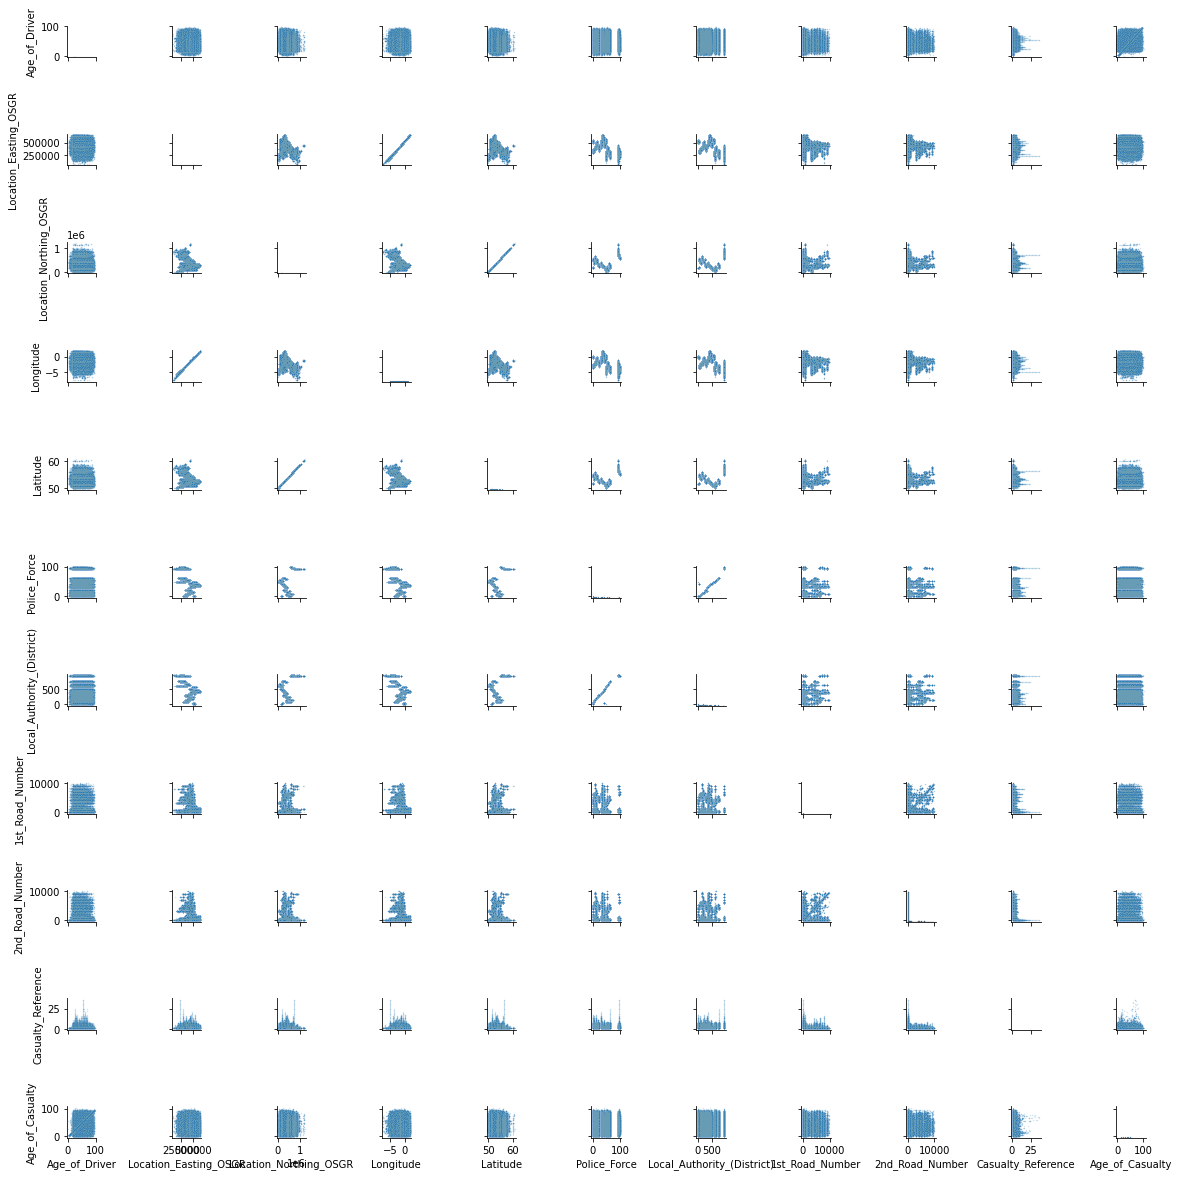

In [28]:


import seaborn as sns

sns.pairplot(df_continuous, height=1.5,
             plot_kws={"s": 2, "alpha": 0.2});

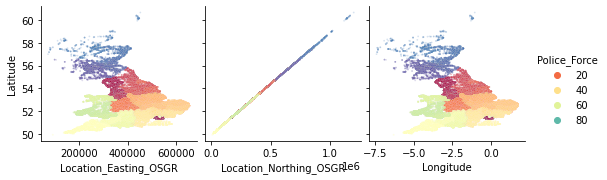

In [ ]:
sns.pairplot(
    df_x,
  	plot_kws={"s": 3, "alpha": 0.2},
  	hue="Police_Force",
  	palette="Spectral",
    x_vars=["Location_Easting_OSGR", "Location_Northing_OSGR", "Longitude"],
    y_vars="Latitude");

In [ ]:
# Create a new dataframe which doesn't contain continuous features
df_discrete = df_x[cols_continuous[~cols_continuous].index]
df_discrete.shape

(360898, 43)

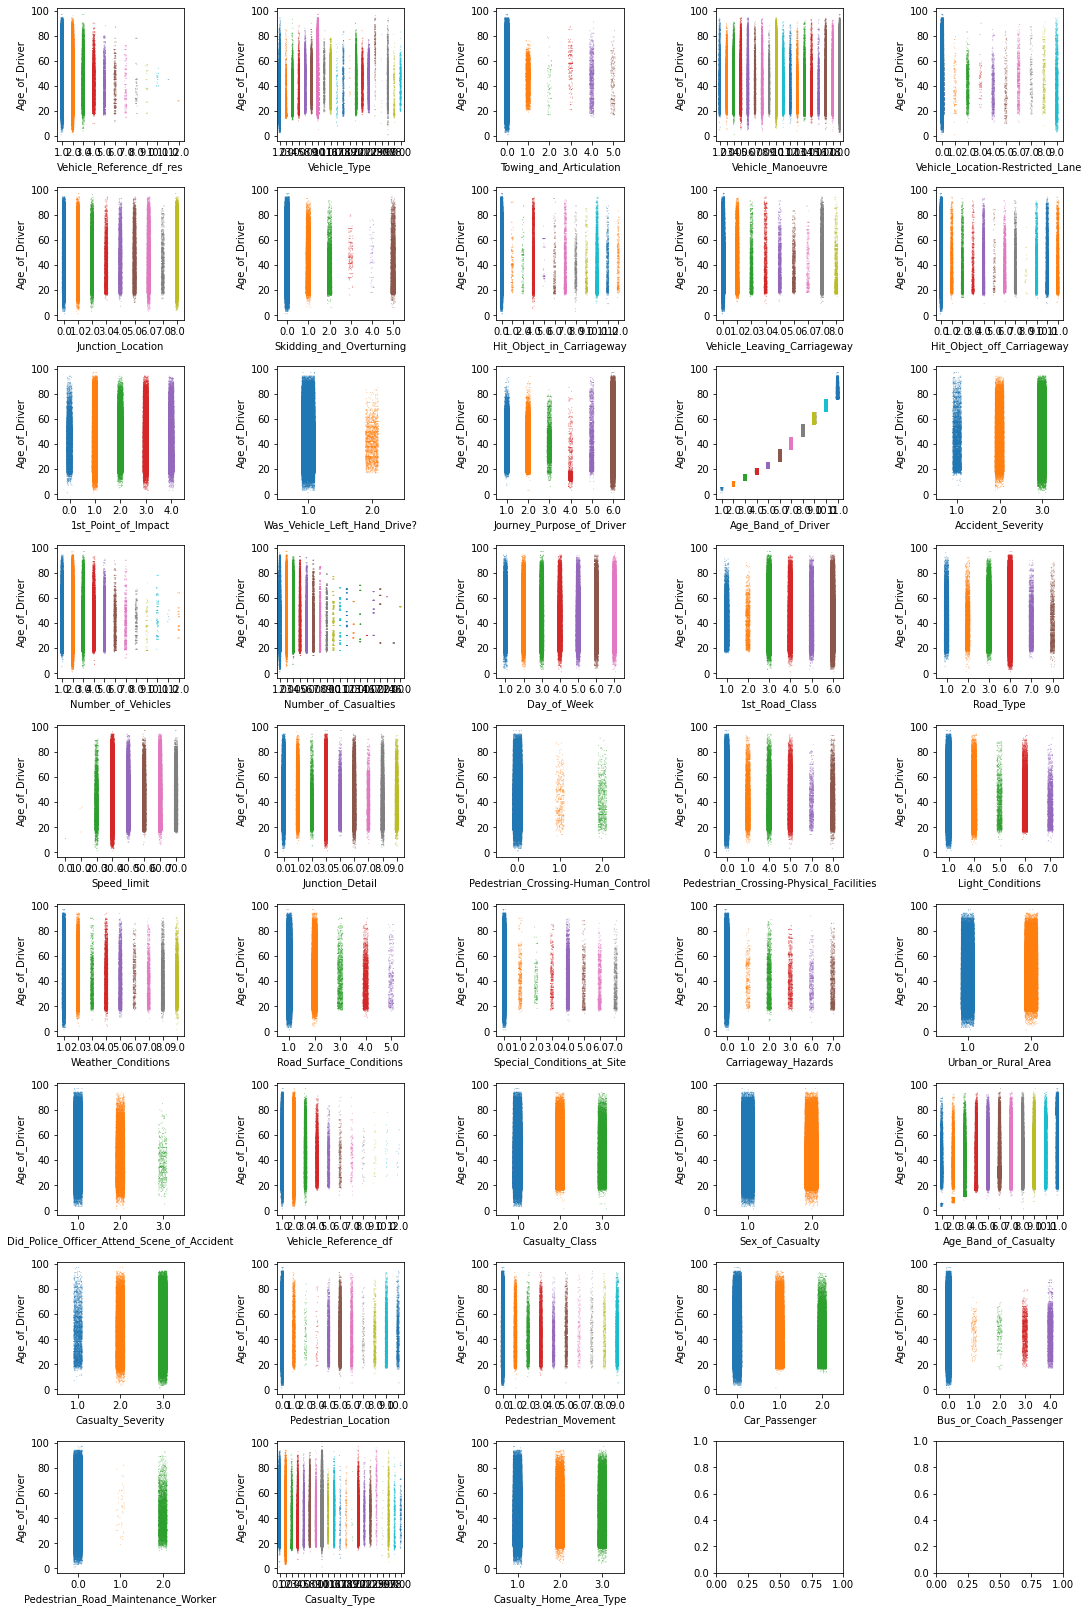

In [ ]:
import numpy as np

# Establish number of columns and rows needed to plot all features
n_cols = 5
n_elements = len(df_discrete.columns)
n_rows = np.ceil(n_elements / n_cols).astype("int")

# Specify y_value to spread data (ideally a continuous feature)
y_value = df_x["Age_of_Driver"]

# Create figure object with as many rows and columns as needed
fig, axes = plt.subplots(
  ncols=n_cols, nrows=n_rows, figsize=(15, n_rows * 2.5))

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_discrete.columns, axes.ravel()):
    sns.stripplot(data=df_x, x=col, y=y_value, ax=ax,
                  palette="tab10", size=1, alpha=0.5)
plt.tight_layout();

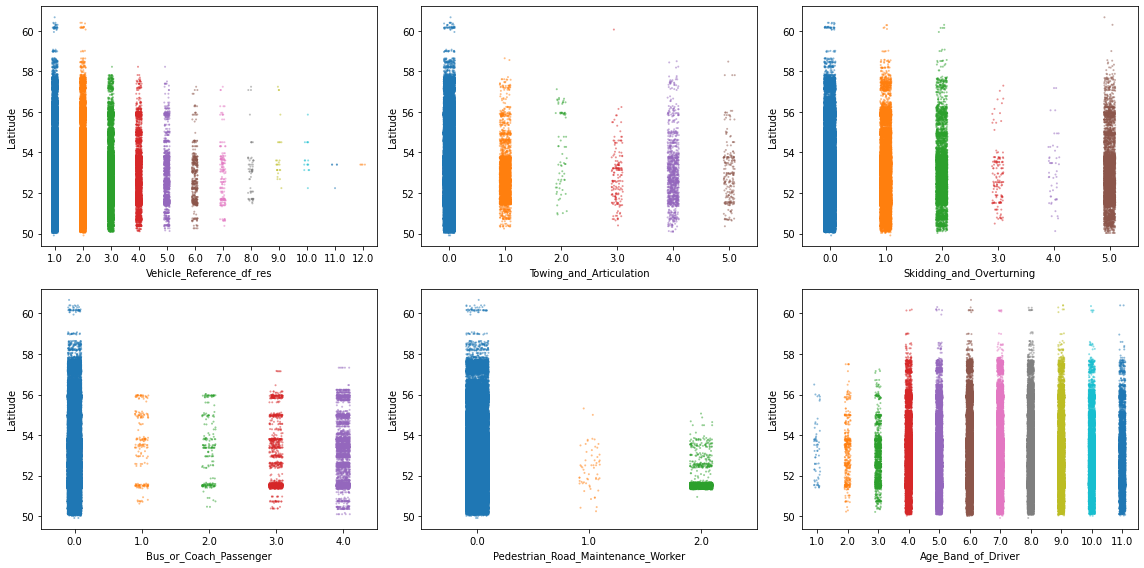

In [ ]:
# Specify features of interest
selected_features = ["Vehicle_Reference_df_res", "Towing_and_Articulation",
                     "Skidding_and_Overturning", "Bus_or_Coach_Passenger",
                     "Pedestrian_Road_Maintenance_Worker", "Age_Band_of_Driver"]

# Create a figure with 3 x 2 subplots
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(16, 8))

# Loop through these features and plot entries from each feature against `Latitude`
for col, ax in zip(selected_features, axes.ravel()):
    sns.stripplot(data=df_x, x=col, y=df_x["Latitude"], ax=ax,
                  palette="tab10", size=2, alpha=0.5)
plt.tight_layout();

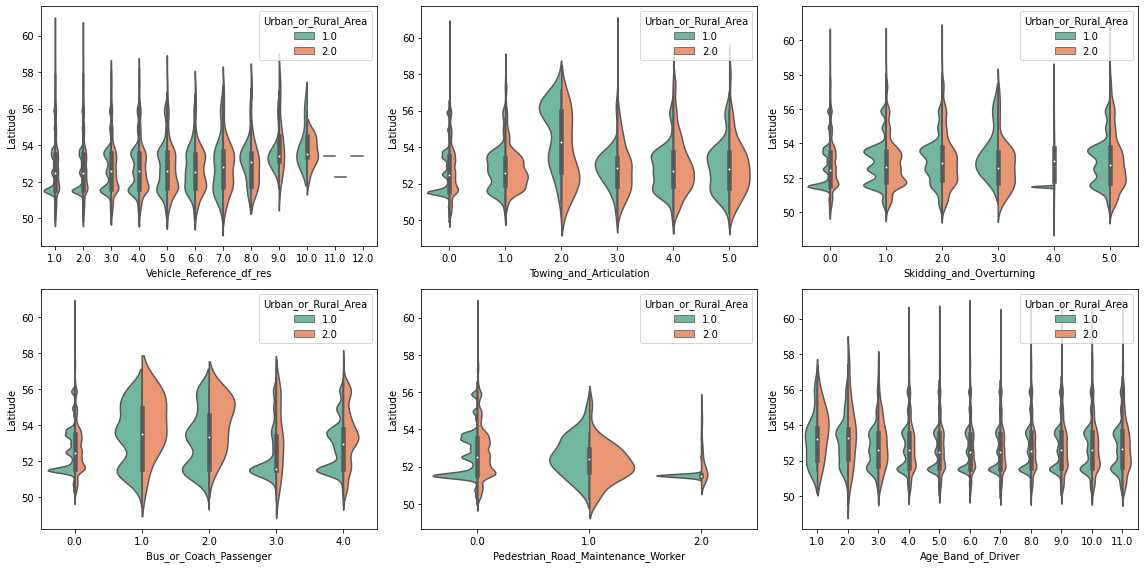

In [ ]:
# Create a figure with 3 x 2 subplots
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(16, 8))

# Loop through these features and plot entries from each feature against `Latitude`
for col, ax in zip(selected_features, axes.ravel()):
    sns.violinplot(data=df_x, x=col, y=df_x["Latitude"], palette="Set2",
                   split=True, hue="Urban_or_Rural_Area", ax=ax)
plt.tight_layout();

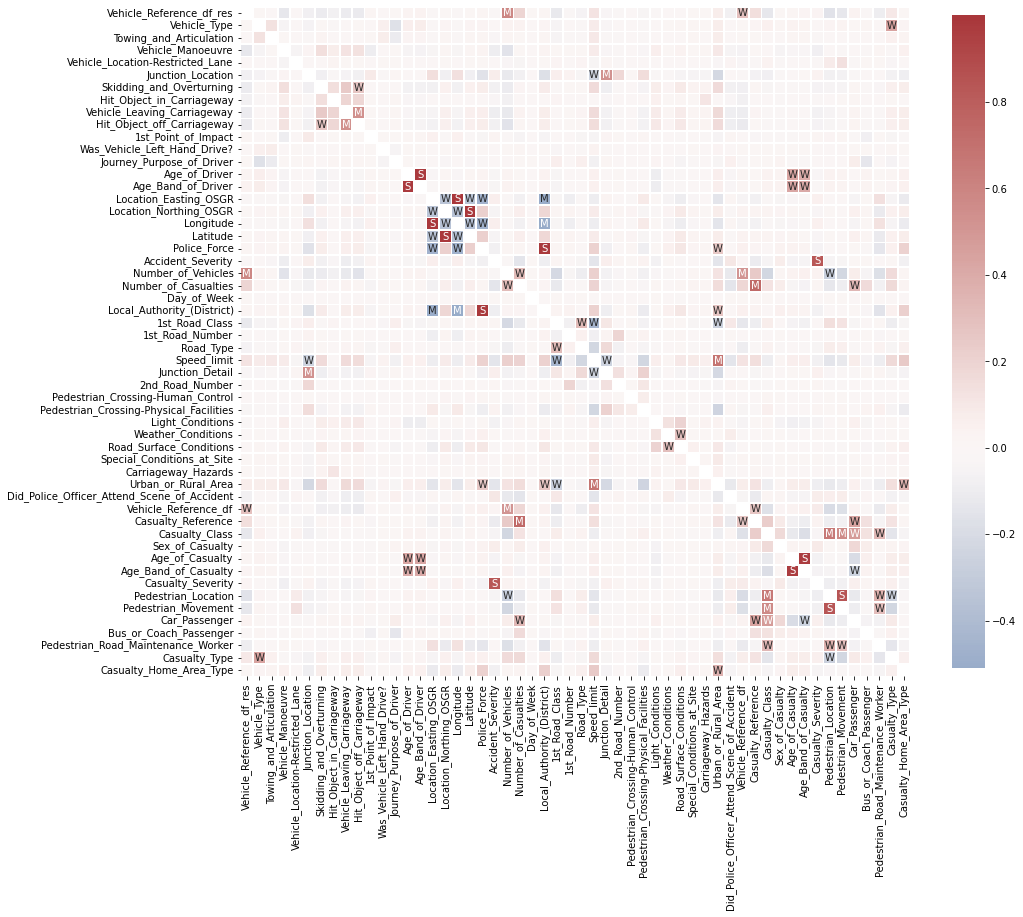

In [ ]:
# Computes feature correlation
df_corr = df_x.corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

In [ ]:
#  Creates a mask to remove the diagonal and the upper triangle.
lower_triangle_mask = np.tril(np.ones(df_corr.shape), k=-1).astype("bool")

#  Stack all correlations, after applying the mask
df_corr_stacked = df_corr.where(lower_triangle_mask).stack().sort_values()

#  Showing the lowest and highest correlations in the correlation matrix
display(df_corr_stacked)



Local_Authority_(District)  Longitude                -0.509388
                            Location_Easting_OSGR    -0.502966
Police_Force                Longitude                -0.471122
                            Location_Easting_OSGR    -0.460905
Speed_limit                 1st_Road_Class           -0.439965
                                                        ...   
Age_Band_of_Casualty        Age_of_Casualty           0.974641
Age_Band_of_Driver          Age_of_Driver             0.979227
Local_Authority_(District)  Police_Force              0.984549
Longitude                   Location_Easting_OSGR     0.999363
Latitude                    Location_Northing_OSGR    0.999974
Length: 1431, dtype: float64

In [ ]:
#https://medium.com/epfl-extension-school/advanced-exploratory-data-analysis-eda-with-python-536fa83c578a

Advanced exploratory data analysis (EDA) with Python